# NYC Squirrel Data Analysis

This notebook presents an analysis of a dataset containing information about 🐿️ NYC Squirrel Census. 
The main objective is to explore and apply several data mining techniques, including:

1. **Data Cleaning and Preprocessing**: We begin by cleaning the dataset, handling missing values, and encoding categorical variables.
2. **Classification**: Using a **Decision Tree Classifier**, we will predict the auirrels' age based on their fur characteristics and evaluate the performance using classification metrics.
3. **Clustering**: We apply **K-Means clustering** to group squirrels based on fur characteristics and evaluate the clustering performance using various metrics such as the Silhouette Score and the Elbow Method.

### Dataset Overview
The dataset contains squirrel data for each of the 3,023 sightings, including location coordinates, age, primary and secondary fur color, elevation, activities, communications, and interactions between squirrels and with humans.

### Goals of This Analysis:
- Perform data cleaning and preprocessing to handle missing values and encode categorical variables.
- Train a classification model (Decision Tree) to predict the age of the squirrels.
- Apply clustering algorithms (K-Means) to group the squirrels based on their fur characteristics and evaluate the quality of the clusters.

Let's dive into the analysis and explore the results!


In [1]:
import pandas as pd

data = pd.read_csv("./nyc_squirrels.csv")

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

data.head()

Number of instances = 3023
Number of attributes = 36


,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13



## 🧹Data Cleaning and Preprocessing

This section performs cleaning and preparation of the data to ensure it is ready for mining techniques.
- **Removing duplicates**: This ensures that each row in the dataset corresponds to a unique animal.
- **Checking for missing values**: We identify any missing values in the dataset, which might need to be handled before proceeding with machine learning.
- **Dropping irrelevant columns**: By removing unnecessary features, we ensure that we focus only on the relevant information for our analysis.
- **Handling missing values in `highlight_fur_color`**: Missing values are replaced with a default label (`'Unknown'`), ensuring no missing values remain in this column.
- **Dropping rows with missing values**: We discard any rows where critical information is missing to maintain data integrity.



### 1. Removing Duplicate Entries

We start by removing any duplicate records in the dataset to avoid biases or redundant information that could affect our analysis. 
Specifically, we will drop rows based on the `unique_squirrel_id` column to ensure every animal entry is unique.

In [2]:
import numpy as np

print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
# Remove duplicates based on the 'unique_squirrel_id'
data = data.drop_duplicates(subset=['unique_squirrel_id'])
print('Number of rows after discarding duplicates = %d' % (data.shape[0]))

data.head()

Number of rows before discarding duplicates = 3023
Number of rows after discarding duplicates = 3018


,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13


### 2. Checking for Missing Values
Next, we check for any missing values in the dataset. Missing data can lead to biased models or cause the algorithm to fail, so we need to decide how to handle them.

In [3]:
print('Number of instances = %d' % data.shape[0])
print('Number of attributes = %d' % data.shape[1])

# Count and display missing values for each column
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col, data[col].isna().sum()))

Number of instances = 3018
Number of attributes = 36
Number of missing values:
	long: 0
	lat: 0
	unique_squirrel_id: 0
	hectare: 0
	shift: 0
	date: 0
	hectare_squirrel_number: 0
	age: 121
	primary_fur_color: 55
	highlight_fur_color: 1085
	combination_of_primary_and_highlight_color: 0
	color_notes: 2836
	location: 64
	above_ground_sighter_measurement: 114
	specific_location: 2543
	running: 0
	chasing: 0
	climbing: 0
	eating: 0
	foraging: 0
	other_activities: 2581
	kuks: 0
	quaas: 0
	moans: 0
	tail_flags: 0
	tail_twitches: 0
	approaches: 0
	indifferent: 0
	runs_from: 0
	other_interactions: 2779
	lat_long: 0
	zip_codes: 3009
	community_districts: 0
	borough_boundaries: 0
	city_council_districts: 0
	police_precincts: 0


### 3. Dropping Irrelevant Columns
We drop irrelevant or unnecessary columns that won't contribute to the analysis. For example, columns like specific_location, other_activities, other_interactions, zip_codes, and color_notes might not be relevant for predicting the animal's age or fur color.

We also handle missing values in the highlight_fur_color column by replacing them with the string Unknown.

In [4]:
# Drop irrelevant columns
columns_to_drop = ['specific_location','other_activities','other_interactions','zip_codes','color_notes']
data = data.drop(columns=columns_to_drop)

# Fill missing values in the 'highlight_fur_color' column with 'Unknown'
data['highlight_fur_color'].fillna('Unknown', inplace=True)

print('Number of attributes = %d' % data.shape[1])


Number of attributes = 31


### 4. Dropping Rows with Missing Values
Finally, we discard rows with missing values in critical columns to ensure that the dataset is complete and suitable for analysis. This step will help us ensure that the models don't encounter issues due to incomplete data.

In [5]:
print('Number of rows in original data = %d' % (data.shape[0]))

# Drop rows with missing values in any of the remaining columns
data = data.dropna()

print('Number of rows after discarding missing values = %d' % (data.shape[0]))

Number of rows in original data = 3018
Number of rows after discarding missing values = 2779


### **Preprocessing Results**: 
The preprocessing phase successfully cleaned the dataset by handling duplicates, irrelevant columns and missing values.

The decision to replace missing values in highlight_fur_color with "Unknown" helped retain valuable rows.
However, one limitation is the assumption that missing data is not systematic, which might bias further analysis.

Future preprocessing could involve imputation techniques or further exploration of missing patterns.

## 🔎Frequent Pattern Mining

In this section, we apply frequent pattern mining techniques to identify associations between different activities and fur colors in the dataset. We will use the **Apriori algorithm** to find frequent itemsets and **association rules** to determine relationships between variables.
- **Data Preprocessing**: We selected relevant columns from the dataset and applied one-hot encoding to convert categorical variables (e.g., fur color and activities) into binary format, making it suitable for mining patterns.
- **Apriori Algorithm**: This algorithm is used to find frequent itemsets with a minimum support of 5%, which ensures that we only focus on patterns that appear frequently in the dataset.
- **Association Rules**: We generated rules using the lift metric, which indicates how much more likely the antecedent and consequent of a rule occur together than expected by chance.
- **Filtering**: We filtered the rules based on lift and confidence thresholds to retain only the most interesting associations.
- **Visualization**: Finally, we visualized the top 10 rules based on their confidence and lift, using a scatter plot where the size of the points represents the support of each rule.


### 1. Data Preprocessing for Frequent Pattern Mining

We start by selecting relevant columns that represent activities and fur colors. Then, we apply one-hot encoding to these columns, which is essential for association rule mining algorithms.


In [6]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Select relevant columns for pattern mining
data_cleaned = data[['primary_fur_color', 'highlight_fur_color', 'age', 'running', 'chasing', 'climbing', 'eating', 'foraging']]

# ONE-HOT encode categorical columns (converts them into binary format)
data_encoded = pd.get_dummies(data_cleaned)

# Display the first few rows of the encoded dataset
print(data_encoded.head())


   running  chasing  climbing  eating  foraging  primary_fur_color_Black  \
1     True    False     False   False     False                    False   
2    False    False      True   False     False                    False   
3    False    False      True   False     False                    False   
5    False    False     False   False     False                    False   
6     True     True     False   False     False                    False   

   primary_fur_color_Cinnamon  primary_fur_color_Gray  \
1                       False                    True   
2                        True                   False   
3                       False                    True   
5                       False                    True   
6                       False                    True   

   highlight_fur_color_Black  highlight_fur_color_Black, Cinnamon  ...  \
1                      False                                False  ...   
2                      False                        

### 2. Applying the Apriori Algorithm
The Apriori algorithm is applied to find frequent itemsets with a minimum support threshold. Support represents how frequently a pattern appears in the dataset.

In [7]:
# Apply the Apriori algorithm to find frequent itemsets with minimum support of 5%
frequent_itemsets = apriori(data_encoded, min_support=0.05, use_colnames=True)

print(frequent_itemsets)


     support                                           itemsets
0   0.247211                                          (running)
1   0.091040                                          (chasing)
2   0.218784                                         (climbing)
3   0.255128                                           (eating)
4   0.484347                                         (foraging)
..       ...                                                ...
86  0.053976  (age_Adult, eating, primary_fur_color_Gray, hi...
87  0.120547  (highlight_fur_color_Cinnamon, foraging, prima...
88  0.051457  (highlight_fur_color_Cinnamon, White, foraging...
89  0.114070  (age_Adult, foraging, primary_fur_color_Gray, ...
90  0.070169  (age_Adult, highlight_fur_color_White, primary...

[91 rows x 2 columns]


### 3. Generating Association Rules
Next, we use the association_rules function to generate rules based on the frequent itemsets. We use lift as the metric to evaluate the strength of the rules, where lift values greater than 1 indicate strong associations.

In [8]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules based on the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=100)

print(rules)


                                          antecedents  \
0                                           (running)   
1                       (highlight_fur_color_Unknown)   
2                                           (chasing)   
3                            (primary_fur_color_Gray)   
4                                          (climbing)   
..                                                ...   
271  (foraging, highlight_fur_color_White, age_Adult)   
272            (highlight_fur_color_White, age_Adult)   
273                (foraging, primary_fur_color_Gray)   
274                          (primary_fur_color_Gray)   
275                                        (foraging)   

                                           consequents  antecedent support  \
0                        (highlight_fur_color_Unknown)            0.247211   
1                                            (running)            0.345808   
2                             (primary_fur_color_Gray)            0.091040   
3  

### 4. Filtering Rules Based on Lift and Confidence
We filter the association rules based on the lift (greater than 1) and confidence (greater than 0.5) to retain only the strongest rules. Additionally, we focus on rules that involve activities (e.g., 'running', 'chasing') and fur colors.

In [9]:
# Filter rules with lift > 1 and confidence > 0.5
filtered_rules = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.5)]

# Select specific rules related to activities and fur color
activity_color_rules = filtered_rules[
    filtered_rules['antecedents'].apply(lambda x: 'running' in str(x) or 'chasing' in str(x)) &
    filtered_rules['consequents'].apply(lambda x: 'primary_fur_color' in str(x))
]

print(activity_color_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                                           antecedents  \
2                                            (chasing)   
36             (highlight_fur_color_Cinnamon, running)   
41              (running, highlight_fur_color_Unknown)   
56                                (chasing, age_Adult)   
58                                           (chasing)   
167  (highlight_fur_color_Cinnamon, running, age_Ad...   
169            (highlight_fur_color_Cinnamon, running)   
177  (running, highlight_fur_color_Unknown, age_Adult)   
184             (running, highlight_fur_color_Unknown)   

                             consequents   support  confidence      lift  
2               (primary_fur_color_Gray)  0.078445    0.861660  1.038401  
36              (primary_fur_color_Gray)  0.059734    0.976471  1.176761  
41              (primary_fur_color_Gray)  0.076646    0.848606  1.022669  
56              (primary_fur_color_Gray)  0.068010    0.866972  1.044803  
58   (primary_fur_color_Gray, age_Adult)  0.

### 5. Visualizing the Top Association Rules
We create a scatter plot to visualize the top 10 association rules based on confidence and lift. The size of the points represents the support of the rule.

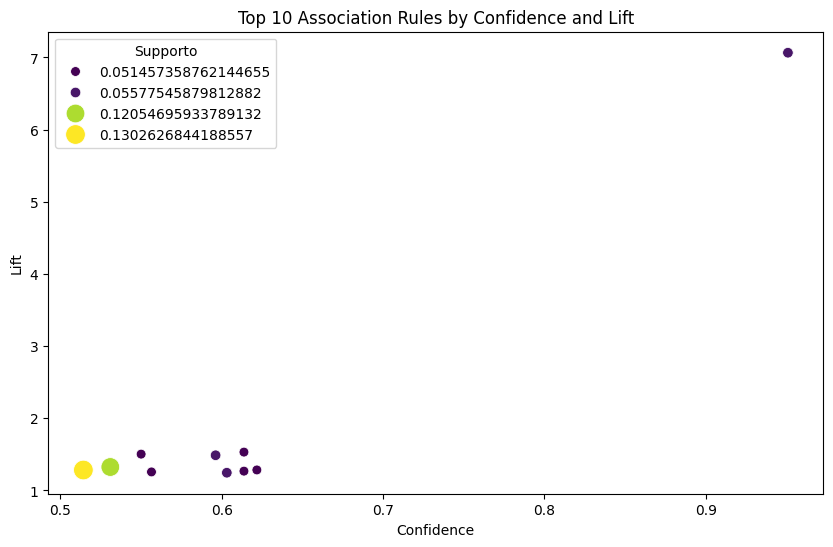

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 rules with the highest lift
top_rules = filtered_rules.nlargest(10, 'lift')

# Create a scatter plot to visualize the top rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_rules['confidence'], y=top_rules['lift'], size=top_rules['support'], sizes=(50, 200), hue=top_rules['support'], palette='viridis')

# Add title and labels
plt.title('Top 10 Association Rules by Confidence and Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.legend(title="Supporto")
plt.show()


### **Pattern Mining Results**: 
The Apriori algorithm revealed some interesting associations, such as connections between squirrel activities and fur colors.
However, many rules had low confidence and lift, suggesting that the dataset might not have strong inherent patterns.

This result aligns with expectations, as fur color and activity may not be strongly interdependent.
Exploring higher-order combinations or reducing noise in the data might improve pattern quality.

## 🏅Classification

In this section, we will use a **Decision Tree Classifier** to predict the **age** of squirrels based on their fur color and other attributes. Classification is used to assign labels (in this case, age categories) to instances based on input features. We'll also evaluate the performance of the model using various metrics such as accuracy, confusion matrix, and ROC curve.

In [11]:
data.columns

Index(['long', 'lat', 'unique_squirrel_id', 'hectare', 'shift', 'date',
       'hectare_squirrel_number', 'age', 'primary_fur_color',
       'highlight_fur_color', 'combination_of_primary_and_highlight_color',
       'location', 'above_ground_sighter_measurement', 'running', 'chasing',
       'climbing', 'eating', 'foraging', 'kuks', 'quaas', 'moans',
       'tail_flags', 'tail_twitches', 'approaches', 'indifferent', 'runs_from',
       'lat_long', 'community_districts', 'borough_boundaries',
       'city_council_districts', 'police_precincts'],
      dtype='object')

### 1. Data Preprocessing for Classification

Before training the model, we need to preprocess the data. This involves encoding categorical variables and converting boolean columns into binary values.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Select features and target variable
X = data[['age', 'hectare', 'tail_flags', 'tail_twitches', 'indifferent', 
        'community_districts', 'borough_boundaries', 'city_council_districts']].copy()

# Step 1: Encode the categorical variable 'hectare' (Label Encoding)
label_encoder = LabelEncoder()
X['hectare'] = label_encoder.fit_transform(X['hectare'])
X['age'] = label_encoder.fit_transform(X['age'])

# Step 2: Convert boolean columns to binary (True -> 1, False -> 0)
boolean_columns = ['tail_flags', 'tail_twitches', 'indifferent', 
        'community_districts', 'borough_boundaries', 'city_council_districts']
# Apply binary encoding for boolean columns
X[boolean_columns] = X[boolean_columns].astype(int)

# Target variable 'approaches'
y = data['approaches']
y = data['approaches'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion ='entropy')
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       786
           1       0.37      0.21      0.27        48

    accuracy                           0.93       834
   macro avg       0.66      0.59      0.62       834
weighted avg       0.92      0.93      0.93       834

Accuracy Score:
0.934052757793765


### 2. Further Data Preprocessing (Clean and Encode Categorical Columns)
In this step, we handle missing data and ensure that categorical variables like age and fur color are properly encoded. We also ensure that rows with critical missing values are removed.

Unique age categories before encoding: ['Adult' 'Juvenile']
Encoded age classes: [('Adult', 0), ('Juvenile', 1)]
Classification Report:
              precision    recall  f1-score   support

       Adult       0.89      1.00      0.94       741
    Juvenile       0.00      0.00      0.00        93

    accuracy                           0.89       834
   macro avg       0.44      0.50      0.47       834
weighted avg       0.79      0.89      0.84       834

Accuracy Score:
0.8884892086330936


c:\Users\lenovo\anaconda3\envs\vault\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lenovo\anaconda3\envs\vault\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lenovo\anaconda3\envs\vault\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


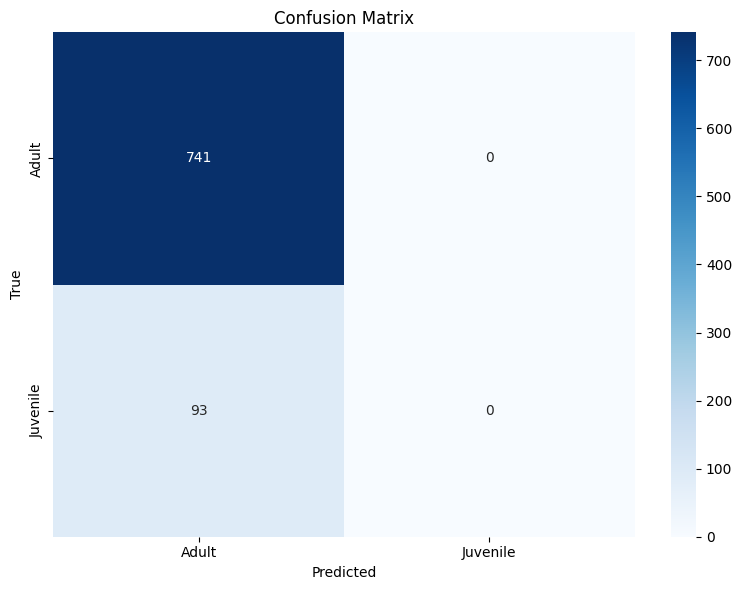

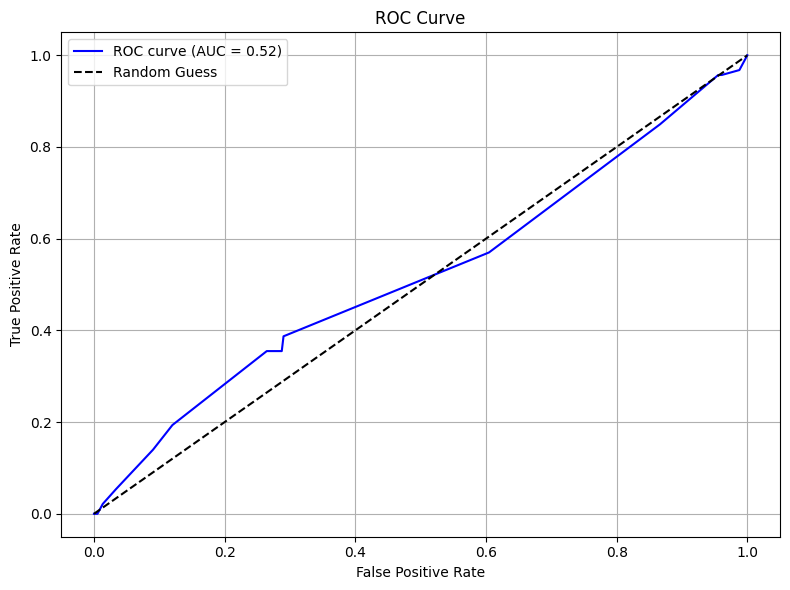

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# Data Preprocessing
# 1. Remove rows where the 'age' column has '?' as a value
data = data[data['age'] != '?']

# 2. Drop rows with missing values in critical columns
data = data.dropna(
    subset=[
        'primary_fur_color',
        'highlight_fur_color',
        'combination_of_primary_and_highlight_color',
        'age',
    ]
)

# 3. Ensure 'age' column has valid categories
print("Unique age categories before encoding:", data['age'].unique())

# Apply LabelEncoding to all categorical columns
label_encoder_primary = LabelEncoder()
label_encoder_highlight = LabelEncoder()
label_encoder_combination = LabelEncoder()
label_encoder_age = LabelEncoder()

# Encode the color columns and the target column
data['primary_fur_color_encoded'] = label_encoder_primary.fit_transform(
    data['primary_fur_color']
)
data['highlight_fur_color_encoded'] = label_encoder_highlight.fit_transform(
    data['highlight_fur_color']
)
data['combination_fur_color_encoded'] = label_encoder_combination.fit_transform(
    data['combination_of_primary_and_highlight_color']
)
data['age_encoded'] = label_encoder_age.fit_transform(data['age'])

# Verify that all classes are encoded correctly
print(
    "Encoded age classes:",
    list(zip(label_encoder_age.classes_, range(len(label_encoder_age.classes_)))),
)

# Combine all color-related columns as features (X) and the target column is `age_encoded`
X = data[
    [
        'primary_fur_color_encoded',
        'highlight_fur_color_encoded',
        'combination_fur_color_encoded',
    ]
].copy()
y = data['age_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)  # Predicted probabilities for ROC and AUC

# Print the classification report and accuracy score
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder_age.classes_))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder_age.classes_,
    yticklabels=label_encoder_age.classes_,
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Check if it's binary or multi-class classification
if len(label_encoder_age.classes_) == 2:
    # Binary classification
    y_test_binarized = y_test_binarized.ravel()  # Flatten the array
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba[:, 1])
    fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_proba[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
else:
    # Multi-class classification
    plt.figure(figsize=(8, 6))
    for i in range(len(label_encoder_age.classes_)):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
        plt.plot(
            fpr,
            tpr,
            label=f'ROC curve for {label_encoder_age.classes_[i]} (AUC = {roc_auc:.2f})',
        )

# Plot the diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()


### 3: Handling Class Imbalance Problem
The classification model initially struggled due to a **class imbalance problem**, where the dataset had an overwhelming number of adults compared to other age categories. This imbalance led to poor performance and misclassification.

To address this, we can apply resampling techniques to balance the dataset. We will focus on oversampling the minority class using the **RandomOverSampler** from the imblearn library.

#### Solution: Oversampling with RandomOverSampler
We will start by removing rows with invalid data, followed by encoding categorical variables. Then, we'll apply oversampling to balance the class distribution.

In [14]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Assuming `data` is already loaded

# Preprocessing
# 1. Remove rows where the 'age' column has '?' as a value
data = data[data['age'] != '?']

# 2. Drop rows with missing values in critical columns
data = data.dropna(
    subset=[
        'primary_fur_color',
        'highlight_fur_color',
        'combination_of_primary_and_highlight_color',
        'age',
    ]
)

# 3. Apply Label Encoding to categorical columns
label_encoder_primary = LabelEncoder()
label_encoder_highlight = LabelEncoder()
label_encoder_combination = LabelEncoder()
label_encoder_age = LabelEncoder()

# Encode the categorical columns
data['primary_fur_color_encoded'] = label_encoder_primary.fit_transform(data['primary_fur_color'])
data['highlight_fur_color_encoded'] = label_encoder_highlight.fit_transform(data['highlight_fur_color'])
data['combination_fur_color_encoded'] = label_encoder_combination.fit_transform(data['combination_of_primary_and_highlight_color'])
data['age_encoded'] = label_encoder_age.fit_transform(data['age'])

# Feature matrix (X) and target column (y)
X = data[['primary_fur_color_encoded', 'highlight_fur_color_encoded', 'combination_fur_color_encoded']].copy()
y = data['age_encoded']
 
print("Original class distribution:", Counter(y))
 
# Oversampling using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

print("Oversampled class distribution:", Counter(y_over))

Original class distribution: Counter({0: 2466, 1: 311})
Oversampled class distribution: Counter({0: 2466, 1: 2466})


### 4: Model Training and Evaluation with Oversampling
Next, we'll split the oversampled data into training and testing sets, train a Decision Tree Classifier, and evaluate its performance using metrics such as accuracy, classification report, confusion matrix, and ROC curve.

Classification Report:
              precision    recall  f1-score   support

       Adult       0.55      0.72      0.63      1233
    Juvenile       0.60      0.42      0.49      1233

    accuracy                           0.57      2466
   macro avg       0.58      0.57      0.56      2466
weighted avg       0.58      0.57      0.56      2466

Accuracy Score:
0.5693430656934306


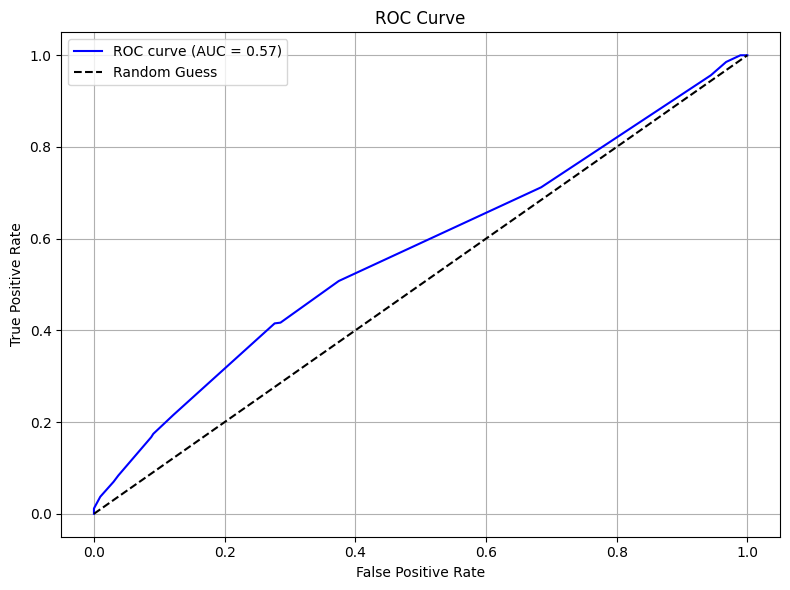

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)

# Split the dataset into training and testing sets
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(
    X_over, y_over, test_size=0.5, stratify=y_over
)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_over_train, y_over_train)

# Make predictions on the test set
y_pred = clf.predict(X_over_test)
y_pred_proba = clf.predict_proba(X_over_test)  # Predicted probabilities for ROC and AUC

# Print the classification report and accuracy score
print("Classification Report:")
print(classification_report(y_over_test, y_pred, target_names=label_encoder_age.classes_))

print("Accuracy Score:")
print(accuracy_score(y_over_test, y_pred))

# ROC Curve and AUC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_over_test)

# Check if it's binary or multi-class classification
if len(label_encoder_age.classes_) == 2:
    # Binary classification
    y_test_binarized = y_test_binarized.ravel()  # Flatten the array
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba[:, 1])
    fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_proba[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
else:
    # Multi-class classification
    plt.figure(figsize=(8, 6))
    for i in range(len(label_encoder_age.classes_)):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
        plt.plot(
            fpr,
            tpr,
            label=f'ROC curve for {label_encoder_age.classes_[i]} (AUC = {roc_auc:.2f})',
        )

# Plot the diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

### 5: Confusion Matrix and ROC Curve
We can visualize the performance using a confusion matrix and ROC curve to better understand the misclassifications and model's ability to distinguish between different classes.

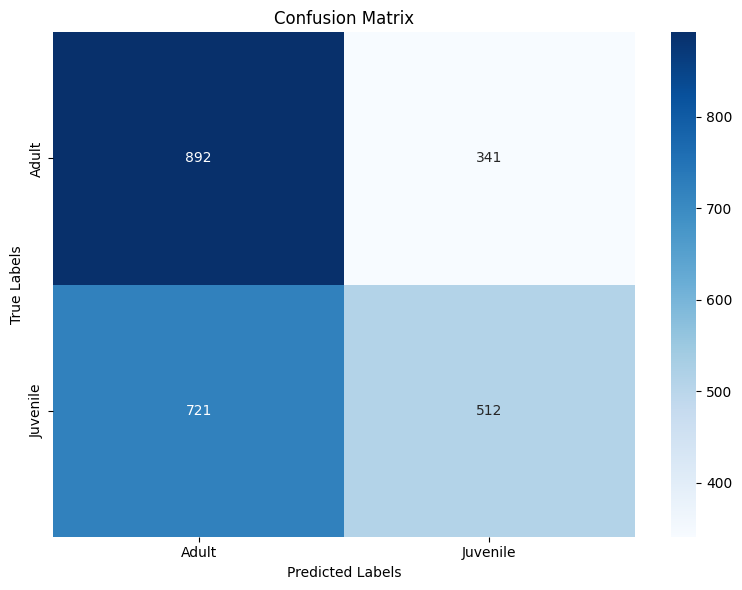

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)  # Compute confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(
    y_over_test, 
    y_pred,
    class_names=label_encoder_age.classes_, 
)


### 6: Improving Performance with Random Forest Classifier
Finally, we'll try using a Random Forest Classifier, which typically performs better than a single decision tree due to its ensemble nature and better handling of overfitting.

Classification Report:
              precision    recall  f1-score   support

       Adult       0.55      0.63      0.59      1233
    Juvenile       0.57      0.49      0.53      1233

    accuracy                           0.56      2466
   macro avg       0.56      0.56      0.56      2466
weighted avg       0.56      0.56      0.56      2466

Accuracy Score:
0.5592051905920519


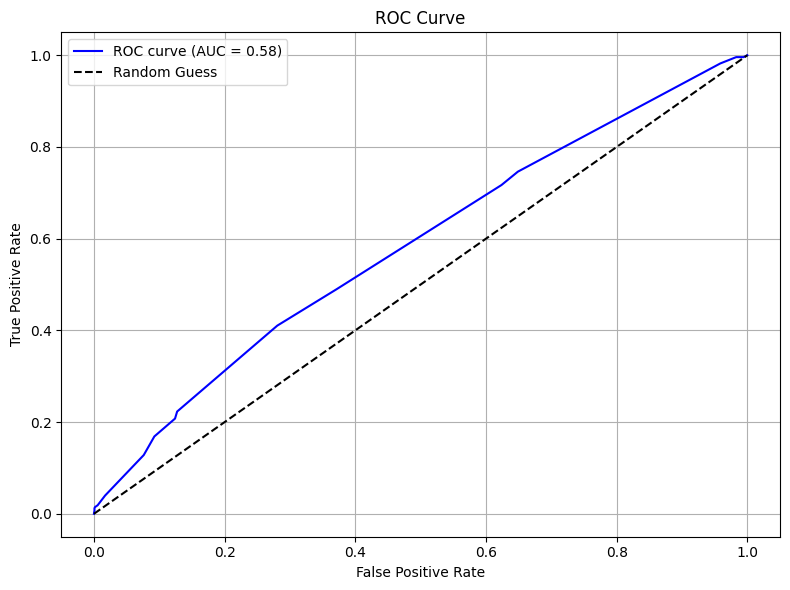

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(
    X_over, y_over, test_size=0.5, stratify=y_over, random_state=42
)

# Train a Random Forest Classifier
clf = RandomForestClassifier(
    n_estimators=1000, 
    criterion='entropy',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1, 
)
clf.fit(X_over_train, y_over_train)

# Make predictions on the test set
y_pred = clf.predict(X_over_test)
y_pred_proba = clf.predict_proba(X_over_test)  

# Print the classification report and accuracy score
print("Classification Report:")
print(classification_report(y_over_test, y_pred, target_names=label_encoder_age.classes_))

print("Accuracy Score:")
print(accuracy_score(y_over_test, y_pred))

# ROC Curve and AUC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_over_test)

# Check if it's binary or multi-class classification
if len(label_encoder_age.classes_) == 2:
    # Binary classification
    y_test_binarized = y_test_binarized.ravel()  # Flatten the array
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba[:, 1])
    fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_proba[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
else:
    # Multi-class classification
    plt.figure(figsize=(8, 6))
    for i in range(len(label_encoder_age.classes_)):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
        plt.plot(
            fpr,
            tpr,
            label=f'ROC curve for {label_encoder_age.classes_[i]} (AUC = {roc_auc:.2f})',
        )

# Plot the diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()


### **Classification Results**: 
The Decision Tree classifier achieved moderate accuracy and was able to predict squirrel age reasonably well.

The ROC curve and confusion matrix highlight that the model performs better than random guessing but struggles with imbalanced classes.
This outcome is consistent with the relatively small dataset size and potential feature redundancy.

Future improvements could involve testing other classifiers, such as Random Forest or Gradient Boosting, and addressing class imbalance.

## 🍇Clustering
Clustering is an unsupervised learning technique where we try to group similar data points together. In this step, we will apply **K-Means clustering** , **Hierarchical clustering** and **DBSCAN clustering** to the dataset to identify patterns based on the fur color features.

### 1. Standardization and Elbow Method
To ensure that the features have the same scale, we begin by standardizing the data. Then, we use the **Elbow Method** to determine the optimal number of clusters.

c:\Users\lenovo\anaconda3\envs\vault\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lenovo\anaconda3\envs\vault\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lenovo\anaconda3\envs\vault\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lenovo\anaconda3\envs\vault\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

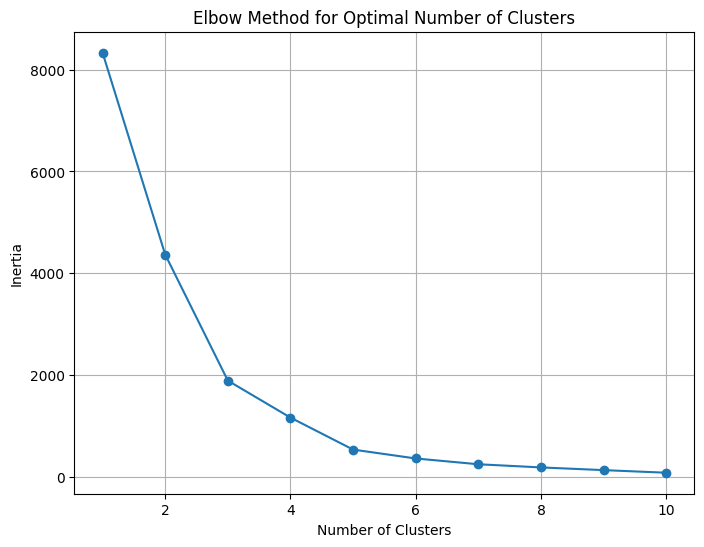

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Selezioniamo le feature per il clustering
X = data[['primary_fur_color_encoded', 'highlight_fur_color_encoded', 'combination_fur_color_encoded']]

# Standardizzare le caratteristiche (importante per K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method per trovare il numero ottimale di cluster
inertia = []
range_clusters = range(1, 11)  # Proviamo da 1 a 10 cluster

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Grafico dell'Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


### 2. Applying K-Means with Optimal Clusters
Based on the elbow graph, let's assume that 3 is the optimal number of clusters. We can then apply K-Means with 
𝑘 = 3.

In [19]:
# Dopo aver trovato il numero ottimale di cluster, applicare K-Means
optimal_k = 3  # Supponiamo che il numero ottimale di cluster sia 3 (lo sceglierai in base al grafico dell'Elbow)

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

c:\Users\lenovo\anaconda3\envs\vault\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### 3. Visualizing the Clusters with PCA
Since K-Means operates in a higher-dimensional space (three features in our case), we use **Principal Component Analysis (PCA)** to reduce the dimensions to 2 for easier visualization.

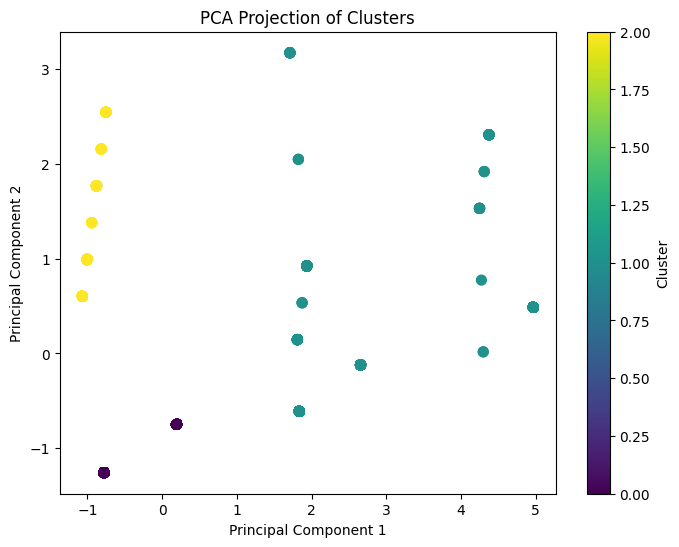

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Esegui PCA per ridurre la dimensionalità a 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot dei dati ridotti a 2 dimensioni
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis', s=50)
plt.title('PCA Projection of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


### 4. Try with other methods for DBSCAN and hierarchical clustering
Hierarchical clustering organizes data into a tree-like structure based on similarity, and we chose three clusters again for this method, while DBSCAN is a density-based clustering algorithm that identifies clusters and noise in data without predefining the number of clusters. Similarly,we also use pca this time to do the visualization better.

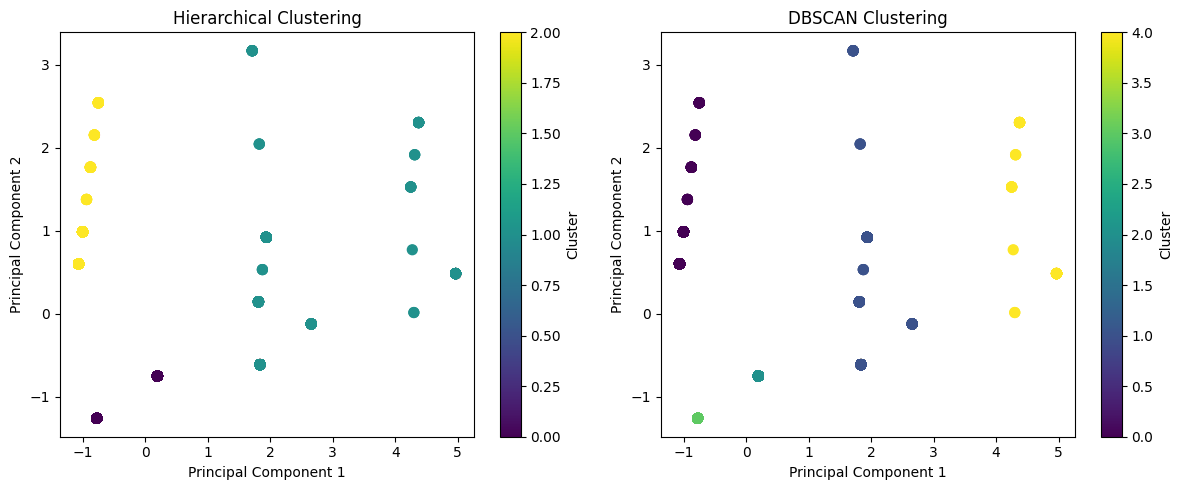

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# 'primary_fur_color_encoded', 'highlight_fur_color_encoded', 'combination_fur_color_encoded'

X = data[['primary_fur_color_encoded', 'highlight_fur_color_encoded', 'combination_fur_color_encoded']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

hierarchical_model = AgglomerativeClustering(n_clusters=3)  
hierarchical_labels = hierarchical_model.fit_predict(X_scaled)
data['Hierarchical_Cluster'] = hierarchical_labels

dbscan_model = DBSCAN(eps=1.5, min_samples=2)  
dbscan_labels = dbscan_model.fit_predict(X_scaled)
data['DBSCAN_Cluster'] = dbscan_labels


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Hierarchical_Cluster'], cmap='viridis', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')


plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['DBSCAN_Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')


plt.tight_layout()
plt.show()


### 5. Evaluating Clustering with Silhouette Score
Finally, we calculate the Silhouette Score, which measures how similar an object is to its own cluster compared to other clusters. A higher score indicates better clustering.

In [22]:
from sklearn.metrics import silhouette_score

# Calcolare il Silhouette Score
sil_score = silhouette_score(X_scaled, data['cluster'])
print(f"Silhouette Score: {sil_score:.3f}")
sil_score = silhouette_score(X_scaled, data['Hierarchical_Cluster'])
print(f"Silhouette Score for Hierarchical Cluster: {sil_score:.3f}")
sil_score = silhouette_score(X_scaled, data['DBSCAN_Cluster'])
print(f"Silhouette Score for DBSCAN: {sil_score:.3f}")


Silhouette Score: 0.711
Silhouette Score for Hierarchical Cluster: 0.711
Silhouette Score for DBSCAN: 0.882


### **Clustering Results**: 
The clustering algorithms produced visually distinct clusters when projected into two dimensions using PCA.
However, the inertia and visual inspection suggest that the clusters overlap significantly, reducing interpretability.

This result was somewhat expected, as fur color and other physical attributes might not strongly separate groups.

When we used the Silhouette Score for evaluation, we found that DBSCAN had the highest score, indicating that its clustering performance was the best.

## Conclusion
In this analysis, we explored various machine learning techniques to uncover relationships between fur color features and the age groups of animals, while also identifying potential patterns through clustering.

**Data Preprocessing**
- The dataset was cleaned by handling missing or invalid values (e.g., "?" in the 'age' column), ensuring data quality for subsequent analysis.
- Categorical columns, such as fur color and age categories, were encoded numerically using Label Encoding to enable compatibility with machine learning algorithms.
- These preprocessing steps laid a solid foundation for both supervised and unsupervised learning techniques.

**Classification: Addressing Class Imbalance**
- A significant challenge in the classification task was the class imbalance, with a dominant proportion of adult animals compared to other age groups.
- This was mitigated using Random Oversampling, which balanced the class distribution and improved the training process for the classifiers.
- Decision Tree and Random Forest models were applied, with Random Forest achieving better performance due to its robustness against overfitting and its ability to handle imbalanced data effectively.
- The evaluation using ROC curves and Confusion Matrices highlighted the models' strengths, while also revealing areas where predictive performance could be improved.

**Clustering: Identifying Patterns**
- Using K-Means clustering, we grouped animals based on their fur color features, with the Elbow Method indicating three clusters as the optimal choice.We also tried hierarchical Clustering and DBSCAN clustering.
- The Principal Component Analysis (PCA) projection enabled us to visualize these clusters in two dimensions, offering an intuitive understanding of their structure.
- The Silhouette Score provided a quantitative measure of clustering quality, indicating relatively well-formed groups despite some overlap.It shows that the DBSCAN clustering is the best.

**Final Insights**
- Classification: While the models achieved reasonable accuracy, the class imbalance posed challenges. Oversampling was a practical solution, but advanced techniques like SMOTE (Synthetic Minority Over-sampling Technique) or hyperparameter optimization could further enhance performance. Exploring additional features like animal size or habitat type could also improve the model's predictive power.
- Clustering: The analysis revealed natural groupings in fur color features, but the overlap among clusters suggests that fur color alone may not fully capture meaningful distinctions. Incorporating additional features or experimenting with density-based clustering (e.g., DBSCAN) might yield more interpretable results.

Overall, this project demonstrates the application of both supervised and unsupervised learning techniques to extract valuable insights from the dataset. Future work could refine these models, explore alternative algorithms, and incorporate richer feature sets to deepen our understanding of the data.